# COGS 108 - Final Project 

# Overview

One important of interacting with people, especially in a society where interacting with people over food is important for personal and professional relationships, takes many forms, including eating at restaurants. When we go out with our friends, families, and colleagues it is crucial that we go to restaurants that are safe and healthy. One way to ensure that our restaurants are inspected are through random health inspections that are unique to each county; in these random health inspections, many things- such as temperature, hygiene, meat/food processing- are checked to make sure that they follow CDC and FDA guidelines. Customer ratings and health inspections are two of the ways that restaurants are kept accountable; this is why I wanted to know if publicizing the health inspection scores on a platform, like Yelp, would improve health in restaurants. After conducting an analysis on this topic, the data does not suggest that publicizing ratings makes restaurants healthier in the future. 

# Name & GitHub

- Name: Chitra Kulkarni
- GitHub Username: chitra66

# Research Question

Does publicizing the health inspection score on platforms, like Yelp, improve the restaurant's overall health (as seen in future inspections) in popular cities such as Raleigh, North Carolina?

## Background and Prior Work

To begin this process, the first thing to research is to look at the restaurant health inspection processes in Raleigh, North Carolina, located in Wake County. In Wake County, restaurants are inspected one to four times a year, depending on what they serve and their food processing [1]. In NC, the grading of food establishments is based on a system of scoring, in which a score of 90 or higher will receive a grade of A, between 80-90 will receive a B, between 70-80 will receive a C; if an establishment receives a score of less than 70, their permit is immediately revoked [2]. In NC, there are 4 risk categories which determine the frequency of the inspections: risk category 1 is for establishments with no potentially hazardous foods, risk category 2 is for establishments with no more than 2 potentially hazardous foods, risk category 3 is for establishments with no more than 3 potentially hazardous foods, and risk category 4 is for establishments with unlimited number of potentially hazardous foods [3]. Risk factors, according to the definitions put forth by the CDC and FDA, are "food preparation practices and employee behaviors most commonly reported to the CDC as contributing factors in foodborne illness outbreaks. [3]"

In an attempt to provide more information to help their customers, Yelp started adding health inspection scores onto their website and apps. This move was based on prior research done on restaurants in LA where restaurants would have to post grade cards in their window. This new rule resulted in a decrease in foodborne illnesses for over two years in the LA area [4]. Since Raleigh, NC is a busy city because of tourism, Yelp started adding restaurant health sanitation scores from March of 2015 [5].

One example of someone who has tried to use scores to test a value of an item is a research project done on if there is a correlation between the price of wine and its corresponding WineEnthusiast score? This project relates to my research question because it is comparing if an item is better or worse based on its score; similarly, I am interested in seeing if the Yelp ratings and health inspection scores posted on Yelp make a restaurant more or less health-conscious [6].

References (include links):

1)http://www.wakegov.com/food/healthinspections/facilities/Pages/restaurants.aspx

2)https://public.cdpehs.com/NCENVPBL/ESTABLISHMENT/ShowRestaurantRules.aspx

3)https://ehs.ncpublichealth.com/faf/docs/foodprot/NC-MarkingInstructionsFinal-110419.pdf

4)https://www.washingtonpost.com/news/voraciously/wp/2018/07/24/yelp-adds-health-inspection-scores-for-restaurants-and-restaurateurs-are-not-happy/

5)https://gcn.com/articles/2015/03/02/yelp-city-restaurant-inspections.aspx

6)FinalProject_group085.ipynb

# Hypothesis


Since restaurants depend on customers' ratings and reviews for their businesses, I believe that publicizing health inspection scores on Yelp will improve overall restaurant health. Especially when customers write reviews regarding any problems that could reflect a restaurant’s health, other customers will be discouraged to go there; additionally, to improve their ratings, restaurants would be more willing to improve their health standards to pass the next inspection.



# Dataset(s)

I used three datasets for this analysis. The first dataset was inspections.csv, which captures all sanitation/health inspections from September 2012 to present. For my analysis, I specifically used the hsisid (state code identifying the restaurant), the facility type (to narrow my analysis to only restaurants), the city (to keep my analysis to just Raleigh, NC), and the zipcode for the restaurants. This dataset had 18466 rows x 36 columns. The second dataset I used was the violations.csv, which has 189802 rows x 18 columns, and describes all violations (and reports which code was violated) at active restaurants in Wake County, from September 2012 to present. In this dataset, I specifically used the hsisid (which is how I merged inspections.csv with violations.csv), violation type, and health inspection scores. There are three violation types described in this dataset: CDI, which is corrected during inspection; VR, which indicates that verification is required within 10 days; and lastly, R, which indicates a repeat offense [1]. The third dataset I used was the yelp.csv (which had 3688 rows x 31 columns), which had information about the restaurants's yelp ratings. From this database, I used the zipcode and ratings information. I used the zipcodes to merge this dataset with violations.csv. 

1) https://ehs.ncpublichealth.com/faf/docs/foodprot/NC-MarkingInstructionsFinal-110419.pdf

# Setup

In [10]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
   
import seaborn as sns
sns.set()
sns.set_context('talk')

In [11]:
#read data
df_insp = pd.read_csv("/home/cnkulkar/Project/Data/inspections.csv")
df_viol = pd.read_csv("/home/cnkulkar/Project/Data/violations.csv")
df_yelp = pd.read_csv("/home/cnkulkar/Project/Data/yelp.csv")

# Data Cleaning

In [12]:
#clean df_insp
df_insp = df_insp.drop(columns = ['date', 'phonenumber', 'top_match', 'second_match', 'days_from_open_date', 'x', 'y', 'geocodestatus', 'type', 'inspectedby', 'inspector_id', 'previous_inspection_by_same_inspector'])

#clean df_viol
df_viol = df_viol.drop(columns = ['inspectedby'])

#clean df_yelp
df_yelp = df_yelp.drop(columns = ['latitude', 'longitude', 'phone', 'hotdogs', 'sandwiches', 'pizza', 'tradamerican', 'burgers', 'mexican', 'grocery', 'breakfast_brunch', 'coffee', 'chinese', 'italian', 'newamerican', 'chicken_wings', 'delis', 'bars', 'salad', 'seafood', 'bbq', 'bakeries', 'sushi'])
df_yelp = df_yelp.rename(columns={'zip_code': 'zip'})

In [13]:
#merge the inspections.csv with violations.csv, using the hsisid
df = pd.merge(df_insp, df_viol, on = 'hsisid')
df.head()

,hsisid,name,address1,address2,city,state,postalcode,restaurantopendate,facilitytype,zip,...,violationcode,severity,shortdesc,comments,pointvalue,observationtype,violationtype,count,cdcriskfactor,cdcdataitem
0,4092013748,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,2002-12-21T00:00:00Z,Restaurant,27610,...,3-603.11,Priority Foundation,Consumer advisory provided for raw or undercoo...,3-603.11; Priority Foundation; Establishment f...,0,Out,CDI,NaN,NaN,NaN
1,4092013748,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,2002-12-21T00:00:00Z,Restaurant,27610,...,3-502.11,Priority Foundation,"Compliance with variance, specialized process,...",Pf - 3-502.11 Variance Requirement - Establish...,0,Out,CDI,NaN,NaN,NaN
2,4092013748,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,2002-12-21T00:00:00Z,Restaurant,27610,...,3-603.11,Priority Foundation,Consumer advisory provided for raw or undercoo...,Pf - 3-603.11 Consumption of Animal Foods that...,0,Out,R,NaN,NaN,NaN
3,4092013748,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,2002-12-21T00:00:00Z,Restaurant,27610,...,3-603.11,Priority Foundation,Consumer advisory provided for raw or undercoo...,Pf - 3-603.11 Consumption of Animal Foods that...,0,Out,VR,NaN,NaN,NaN
4,4092013748,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,2002-12-21T00:00:00Z,Restaurant,27610,...,8-201.13,Core,"Compliance with variance, specialized process,...",Raw fish is used for sushi (sushi chef not pre...,0,Out,NaN,NaN,NaN,NaN


In [15]:
#merge the inspections.csv and yelp.csv dataframes with the zipcodes
df2 = pd.merge(df_insp, df_yelp, on = 'zip')

#make sure that the data includes only restaurants that are in the Raleigh
df2 = df2.drop(df2[df2['facilitytype'] != 'Restaurant'].index)
df2 = df2.drop(df2[df2['city'] != 'raleigh'].index)
df2.head()

,hsisid,name_x,address1_x,address2,city,state,postalcode,restaurantopendate,facilitytype,zip,...,avg_neighbor_num_critical,avg_neighbor_num_non_critical,critical,id,name_y,is_closed,rating,review_count,address1_y,price
0,4092013748,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,2002-12-21T00:00:00Z,Restaurant,27610,...,NaN,NaN,1,best-western-raleigh-inn-and-suites-raleigh,holiday inn express & suites raleigh ne - medi...,False,3.0,7,3618 New Bern Ave,$$
1,4092013748,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,2002-12-21T00:00:00Z,Restaurant,27610,...,NaN,NaN,1,walnut-creek-ampitheatre-raleigh,walnut creek ampitheatre,False,3.0,44,3801 Rock Quarry Rd,$$
2,4092013748,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,2002-12-21T00:00:00Z,Restaurant,27610,...,NaN,NaN,1,kfc-raleigh-7,kfc,False,2.0,5,3408 Poole Road,$
3,4092013748,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,2002-12-21T00:00:00Z,Restaurant,27610,...,NaN,NaN,1,sheetz-raleigh,sheetz,False,3.5,6,5200 New Bern Ave,$
4,4092013748,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,2002-12-21T00:00:00Z,Restaurant,27610,...,NaN,NaN,1,walmart-raleigh-3,walmart,False,2.0,12,4431 New Bern Ave,$


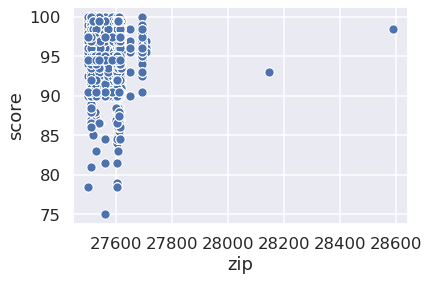

In [16]:
#graph zip and score, grouping by the zip code 
z = df.groupby(df['zip'])
sns.scatterplot(x = df['zip'], y = df2['score'])

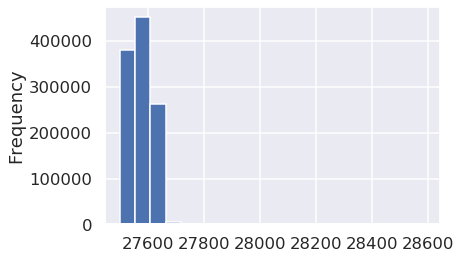

In [17]:
#check the spread of zipcodes, grouping by the zip codes
df.groupby(df['zip'])
zip_plot = df['zip'].plot.hist(bins = 20)

# Data Analysis & Results

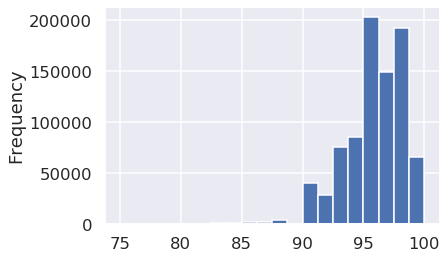

In [19]:
#plot the frequency of the health inspection scores, using yelp and inspections data
score_plot = df2['score'].plot.hist(bins = 20)

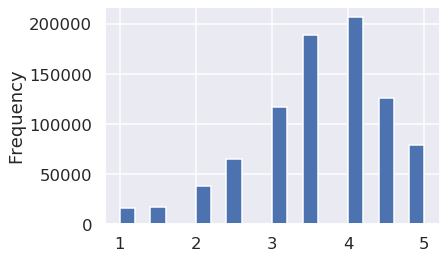

In [20]:
#plot the frequency of the yelp rating, using yelp and inspections data
rating_plot = df2['rating'].plot.hist(bins = 20)

In [21]:
#transform to be able to see the absolute change instead of the relative change
df2['score'] = np.log10(df2['score'])
df2['rating'] = np.log10(df2['rating'])

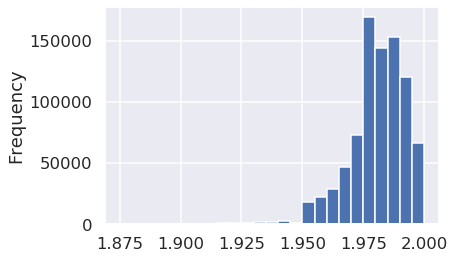

In [26]:
#graph the log_transformation of health inspection scores
df2['score'].plot(kind = 'hist', bins = 25)

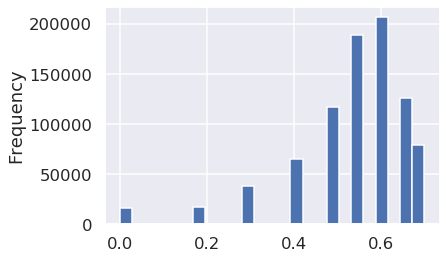

In [25]:
#graph the log_transformations of yelp rating
df2['rating'].plot(kind = 'hist', bins = 25)

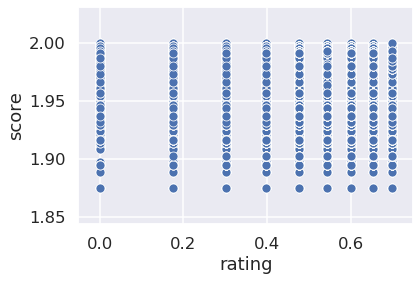

In [28]:
#graph the rating as the x-axis and score as the y-axis
sns.scatterplot(x = df2['rating'], y = df2['score'], data = df2)

# Ethics & Privacy

Since health inspections and their reports are public record, it was crucial to remove the names of health inspectors, their ID's, and anything that would identify them for privacy reasons. Since privacy concerns are more related to individual people, rather than establishments, I did not remove any identifying information for the restaurants, including zipcodes, addresses, hsisid, and phone numbers. 

On the other hand, there are more considerations when it comes to ethics than privacy in this analysis. Firstly, I only conducted my analysis in one city in US; there is a danger that the results of this analysis could be used to describe restaurants all over the country, which would be wrong. One ethics concern from the start of this analysis, is the bias that comes from choosing only restaurants in only one area. One way to reduce this bias is using all restaurants in Raleigh, and not choosing certain restaurants, which is what I did. In addition, it is crucial in the discussion section to explain how the results are only applicable to Raleigh's restaurants and their connection to Yelp reviews. Lastly, the health inspection informtion is already public but connecting yelp reviews to those inspections could be used to argue against the importance of health inspections, which is not the goal of the analysis. 

# Conclusion & Discussion

Based on this analysis, I can conclude that in Raleigh, NC, the ratings on yelp do not influence future health inspection scores; my hypothesis that the ratings would make restaurants healthier is wrong.

One issue I encountered in my analysis was the fact that there were more retaurants from a specific zip code than other zip codes, which is illustrated in the first few graphs which show a skew when graphing the zip code with the scores. However, one I explored this data a bit more, I realized that this skew was not because of health inspection scores, but actually a result of the dataset having more restaurants in the 27600 zip. This is when I decided it would be better to answer the question I asked if I just directly compared the scores to the ratings.

Another limitation of the data related to the health inspection process and reports. First, the reports contain mostly non-numerical items, which cannot be used in a numerical analysis. Second, even though this data went back to 2012, the fields that were considered in the analysis would not reflect changes in the process, if any.